# Computer vision - Week_05 - Image convolution

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from skimage import data, exposure, transform
from scipy import signal
from scipy.ndimage import binary_dilation
from scipy.ndimage import zoom

# from IPython.display import display

In [2]:
plt.rcParams['text.color'] = 'black'
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'
plt.rcParams['font.size'] = 18

## Introduction to Image Convolution
Image convolution is a fundamental concept in the field of computer vision and image processing. It plays a crucial role in various applications, including image filtering, feature extraction, and image enhancement. In this introduction, we'll explore the concept of image convolution and its importance in analyzing and manipulating digital images.


### What is Image Convolution?
Image convolution is a mathematical operation used to process and transform digital images. It involves combining an input image with a small, predefined matrix called a kernel or filter. This kernel is typically a 2D array with numerical values. The operation is performed by sliding the kernel over the input image, multiplying the values of the kernel with the corresponding pixel values in the image, and summing the results to produce a new pixel value in the output image.


### Why is Image Convolution Important?
Image convolution is a versatile and powerful technique for several reasons:

**Filtering:** Convolution is used for image filtering, which helps in removing noise, enhancing features, and improving the overall quality of an image. Common filters include blurring, sharpening, and edge detection filters.
**Feature Extraction:** Convolution is essential for feature extraction. By applying specific kernels, you can highlight and extract important patterns, edges, or objects in an image. This is especially useful in object recognition and tracking.
**Edge Detection:** One of the most popular applications of image convolution is edge detection. It allows you to identify and enhance the boundaries of objects within an image, making it easier to segment and analyze.
**Image Transformation:** Convolution can be used for geometric transformations such as scaling, rotation, and warping of images. It's also used in image registration and alignment.


### The Convolution Process:
Place the kernel on the input image: The kernel is positioned in the top-left corner of the image.
Element-wise multiplication: Multiply each element of the kernel by the corresponding pixel value in the image.
Summation: Sum up the results of the multiplications to obtain a single value.
Place the result in the output image: Store this value in the output image at the same position as the kernel's center.
Slide the kernel: Move the kernel to the right (or downwards, depending on the desired direction), repeating the process until it covers the entire image.
By applying this process, you can create an output image that reflects the characteristics or effects of the chosen kernel.

## Implement convolution

- Create a 3x3 kernel filled with ones: This line initializes a 3x3 NumPy array called kernel where all elements are set to 1. This is a simple kernel that will be used for convolution.
- Normalize the kernel: To ensure that the sum of all elements in the kernel is 1 (making it a valid convolution kernel), each element is divided by the total number of elements in the kernel, which is mask_size. This normalization ensures that the output image maintains the same brightness as the input image.
- Load an example image: The code loads an example image called "camera" from the skimage library. You can replace this image with any other image you want to apply the convolution operation to.
- Create an empty image for convolution: The code initializes an empty NumPy array called conv_img with the same dimensions as the original image. This empty array will store the result of the convolution operation.

In [3]:
# Create a 3x3 kernel filled with ones
kernel = np.ones((3, 3))

# Normalize the kernel by dividing each element by the sum of all elements in the kernel
mask_size = kernel.size
kernel = kernel * (1 / mask_size)

# Display the kernel
print(f'Kernel:')
print(kernel)

# Load an example image (in this case, the "camera" image from scikit-image)
orig_img = data.camera()

# Create an empty image (conv_img) with the same dimensions as the original image
conv_img = np.zeros(shape=orig_img.shape)

# Store the shape of the original image in orig_img_shape
orig_img_shape = orig_img.shape
kernel_shape = kernel.shape

Kernel:
[[0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]
 [0.11111111 0.11111111 0.11111111]]


C:\Users\rposa\anaconda3\lib\site-packages\paramiko\transport.py:219: CryptographyDeprecationWarning: Blowfish has been deprecated
  "class": algorithms.Blowfish,



- for i in range(0, orig_img_shape[0] - kernel_shape[0] + 1): This loop iterates through rows of the original image, ensuring that the kernel is entirely contained within the image in the vertical direction.
- for j in range(0, orig_img_shape[1] - kernel_shape[1] + 1): This nested loop iterates through columns of the original image, ensuring that the kernel is entirely contained within the image in the horizontal direction.
- mask_img_mult = orig_img[i:i+mask_shape[0], j:j+kernel_shape[1]] * mask: Within each iteration of the loops, this line extracts a region from the original image that matches the size of the kernel and multiplies it element-wise with the kernel (mask). This step represents the element-wise multiplication in the convolution process.
- conv_img[i + 1, j + 1] = np.sum(mask_img_mult): After element-wise multiplication, this line calculates the sum of the elements in mask_img_mult and assigns the result to the corresponding pixel in the conv_img array. This step represents the summing operation in convolution.
The code then creates a figure for displaying the original and convolved images, setting the figure's size.

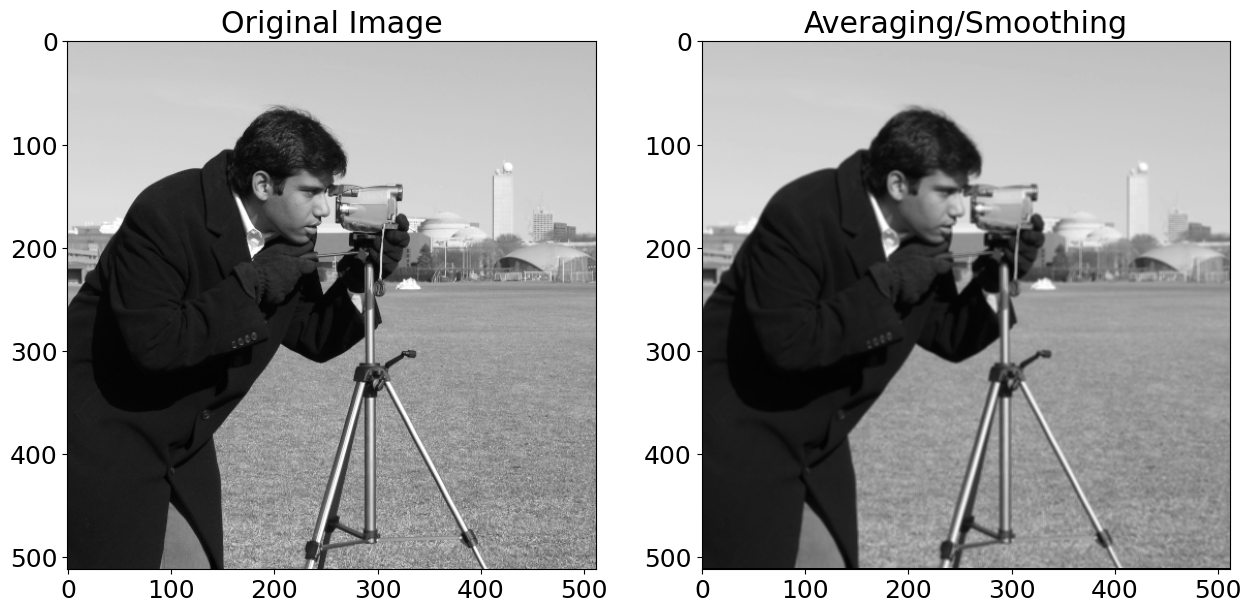

In [4]:
for i in range(0, orig_img_shape[0] - kernel_shape[0] + 1):
    for j in range(0, orig_img_shape[1] - kernel_shape[1] + 1):
        # Extract a region from the original image that matches the size of the kernel
        mask_img_mult = orig_img[i:i+kernel_shape[0], j:j+kernel_shape[1]] * kernel

        # Compute the convolution result and store it in the conv_img array
        conv_img[i + 1, j + 1] = np.sum(mask_img_mult)

# Create a figure for displaying the original and convolved images
plt.figure(figsize=(15, 10))

# Subplot 1: Original Image
plt.subplot(121)
plt.title("Original Image")
plt.imshow(orig_img, cmap='gray')

# Subplot 2: Convolution Result (Averaging/Smoothing)
plt.subplot(122)
plt.title("Averaging/Smoothing")
plt.imshow(conv_img.astype(dtype=np.uint8), cmap='gray')


"We smoothed the grayscale image of a photographer using convolution with a 3x3-sized kernel. The resulting image retained black edges at the corners. This means that, as we progressively apply the convolution kernel to the image, it affects the edges of the resulting image."

## Convolution types
**Full Convolution:**
- **Output Size:** In the full convolution mode, the output size is larger than the input size. The output size is determined by adding the size of the kernel minus one to the input size in each dimension.
- **Border Handling:** The full convolution considers all possible positions of the kernel over the input signal or image, even if it means extending beyond the borders of the input.
- **Use Cases:** Full convolution is used when you want to capture all possible overlapping regions between the input and the kernel. This mode is often used for tasks like feature extraction and when you need to preserve all information in the input.

**Same Convolution:**
- **Output Size:** In the same convolution mode, the output size is the same as the input size. The convolution result is centered on the input image or signal.
- **Border Handling:** Same convolution pads the input so that the kernel can be centered over the input without extending beyond its borders. Typically, zero-padding is added to achieve this.
- **Use Cases:** Same convolution is commonly used when you want the output to have the same dimensions as the input. It is useful for tasks like smoothing or filtering while keeping the image size constant.

**Valid Convolution:**
- **Output Size:** In the valid convolution mode, the output size is smaller than the input size. It only considers positions where the kernel fully overlaps with the input without extending beyond its borders.
- **Border Handling:** Valid convolution does not add any padding to the input. It only computes the convolution for positions where the kernel completely fits within the input.
- **Use Cases:** Valid convolution is used when you want to reduce the dimensions of the output or when you are only interested in the central part of the convolution result. It's commonly used for tasks like edge detection or dimensionality reduction.

Text(0.5, 1.0, 'Full Convolution')

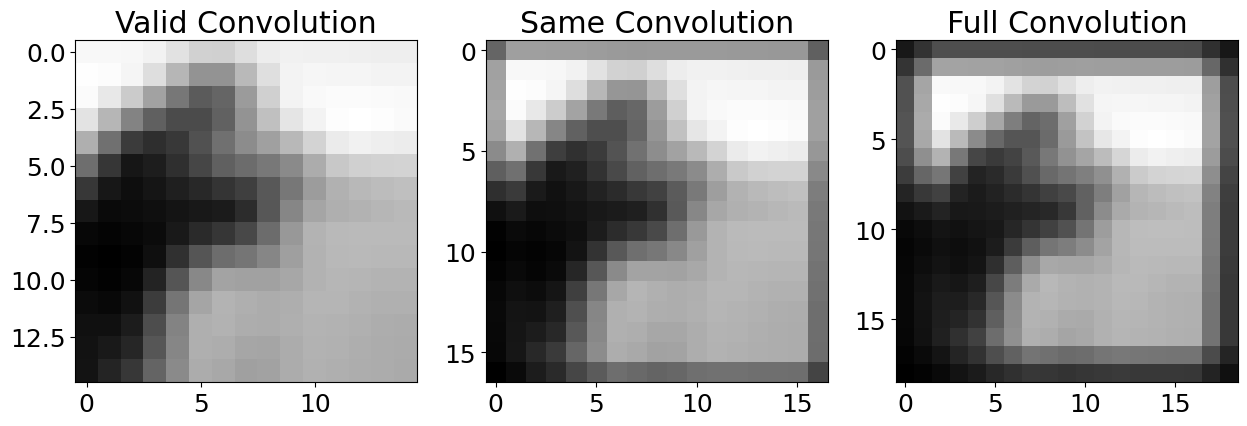

In [5]:
# Resize the original image to a smaller size (for demonstration)
orig_img2 = transform.resize(orig_img, np.floor(np.array(orig_img_shape) / 30).astype(np.uint8))

# Perform convolution using different modes: full, same, and valid
full_conv = signal.convolve2d(orig_img2, kernel, mode='full')
same_conv = signal.convolve2d(orig_img2, kernel, mode='same')
valid_conv = signal.convolve2d(orig_img2, kernel, mode='valid')

# Create a figure for displaying the convolution results
plt.figure(figsize=(15, 10))
plt.set_cmap('gray')

# Subplot 1: Display the result of valid convolution
plt.subplot(131)
plt.imshow(valid_conv)
plt.title("Valid Convolution")

# Subplot 2: Display the result of same convolution
plt.subplot(132)
plt.imshow(same_conv)
plt.title("Same Convolution")

# Subplot 3: Display the result of full convolution
plt.subplot(133)
plt.imshow(full_conv)
plt.title("Full Convolution")

## Multiple convolution

Gaussian Kernel:
[[0.01134374 0.08381951 0.01134374]
 [0.08381951 0.61934703 0.08381951]
 [0.01134374 0.08381951 0.01134374]]


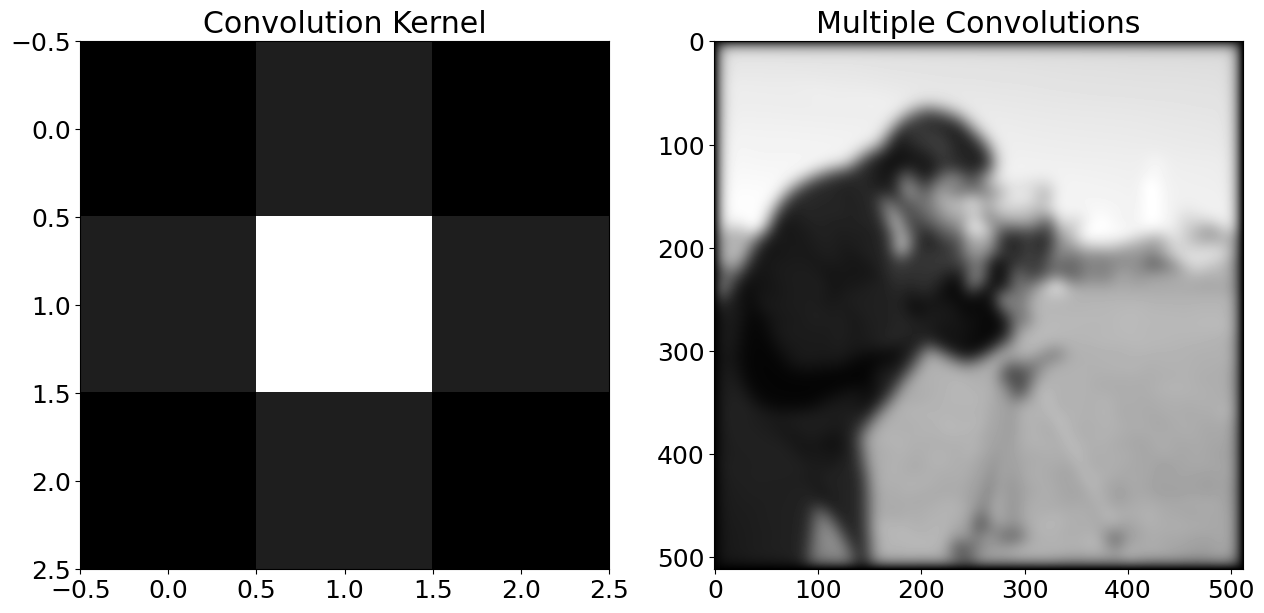

In [6]:
# Load an example image (in this case, the "camera" image from scikit-image)
orig_img = data.camera()
# Create a 2D Gaussian kernel using the outer product of two 1D Gaussian functions
kernel = np.outer(signal.gaussian(3, 0.5), signal.gaussian(3, 0.5))

# Normalize the kernel to ensure that the sum of its elements is 1
kernel = kernel / np.sum(kernel)

# Display the Gaussian kernel
print("Gaussian Kernel:")
print(kernel)

# Create a figure for displaying the kernel and the result of multiple convolutions
plt.figure(figsize=(15, 10))

# Subplot 1: Display the Gaussian kernel
plt.subplot(121)
plt.title("Convolution Kernel")
plt.imshow(kernel, cmap='gray')

# Subplot 2: Display the result of multiple convolutions
plt.subplot(122)
plt.title("Multiple Convolutions")


# Define the number of convolution iterations
num_iterations = 300

for i in range(num_iterations):
    orig_img = signal.convolve2d(orig_img, kernel, mode='same')

# Display the final result
plt.imshow(orig_img, cmap='gray')
plt.show()

## Various kernels example

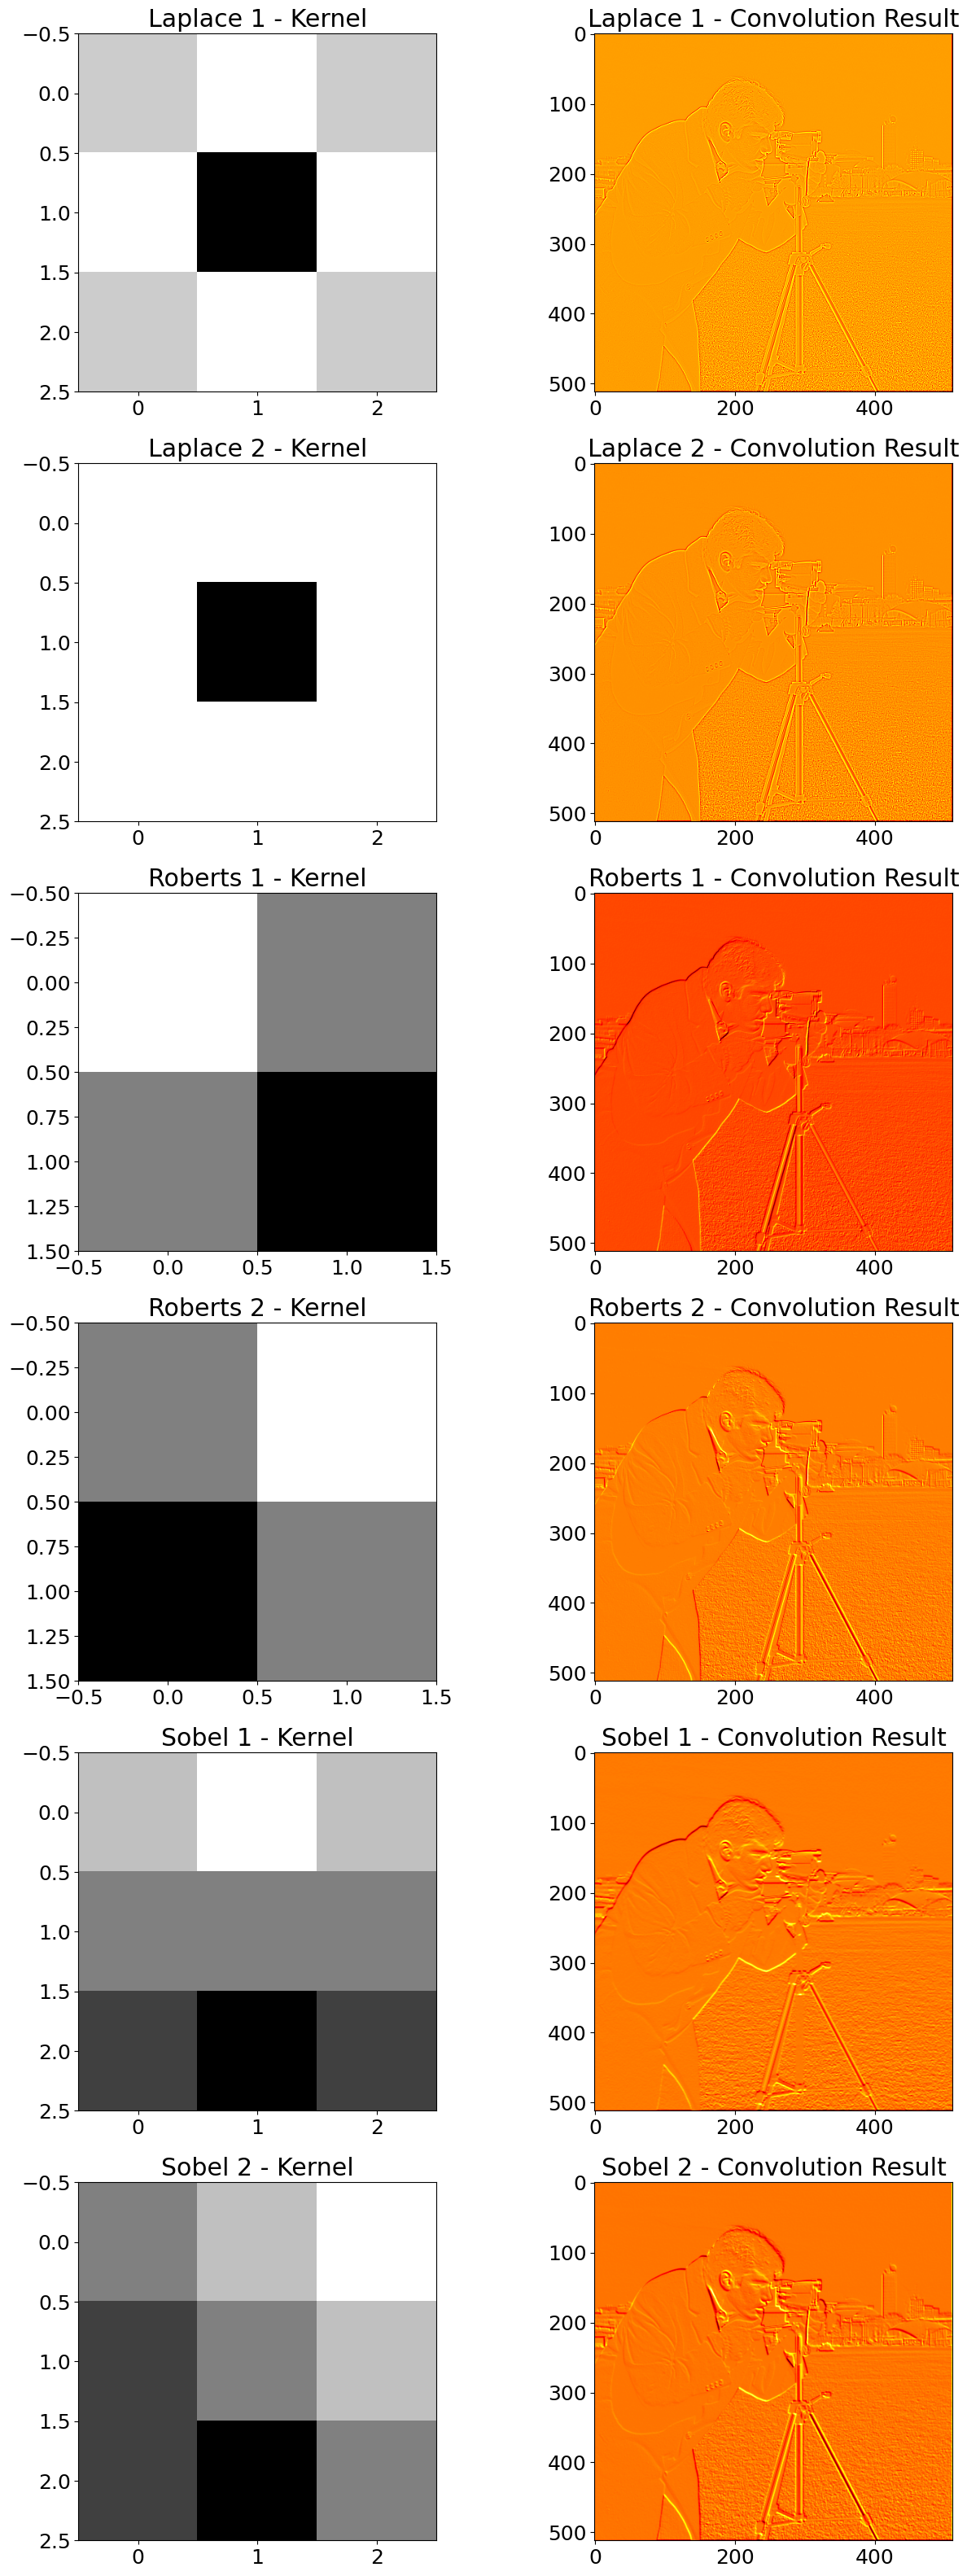

In [7]:
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt

# Load an example image (in this case, the "camera" image from scikit-image)
orig_img = data.camera()

# Convolution Kernels
laplace_1_kernel = np.array([[0, 1, 0],
                             [1, -4, 1],
                             [0, 1, 0]])

laplace_2_kernel = np.ones((3, 3))
laplace_2_kernel[1, 1] = -8

roberts_1_kernel = np.array([[1, 0],
                             [0, -1]])

roberts_2_kernel = np.array([[0, 1],
                             [-1, 0]])

sobel_1_kernel = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
sobel_2_kernel = np.array([[0, 1, 2], [-1, 0, 1], [-1, -2, 0]])

# Create a figure for displaying the convolution results and kernel visualizations
plt.figure(figsize=(15, 40))

# Define a list of kernel and name pairs
kernels = [
    (laplace_1_kernel, "Laplace 1"),
    (laplace_2_kernel, "Laplace 2"),
    (roberts_1_kernel, "Roberts 1"),
    (roberts_2_kernel, "Roberts 2"),
    (sobel_1_kernel, "Sobel 1"),
    (sobel_2_kernel, "Sobel 2")
]

# Loop through each kernel and its name
for i, (kernel, kernel_name) in enumerate(kernels):
# Subplot: Display the Kernel
    plt.subplot(len(kernels), 2, i * 2 + 1)
    plt.imshow(kernel, cmap='gray')
    plt.title(f"{kernel_name} - Kernel")

    # Subplot: Display the Convolution Result
    plt.subplot(len(kernels), 2, i * 2 + 2)
    conv_result = signal.convolve2d(orig_img, kernel, mode='same')
    plt.imshow(conv_result, cmap='hot')
    plt.title(f"{kernel_name} - Convolution Result")

plt.show()


### Another examples

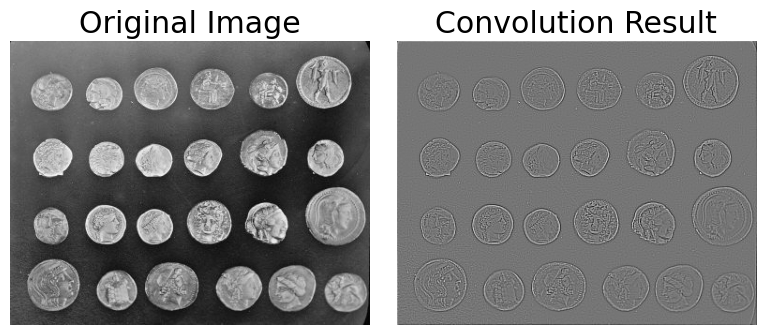

In [8]:
# Load an example image from scikit-image
image = data.coins()

# Define a simple convolution kernel (e.g., edge detection)
kernel = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Apply convolution using SciPy's signal.convolve2d
result = signal.convolve2d(image, kernel, mode='same', boundary='wrap')

# Plot the original image
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the result of convolution
plt.subplot(122)
plt.imshow(result, cmap='gray')
plt.title('Convolution Result')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


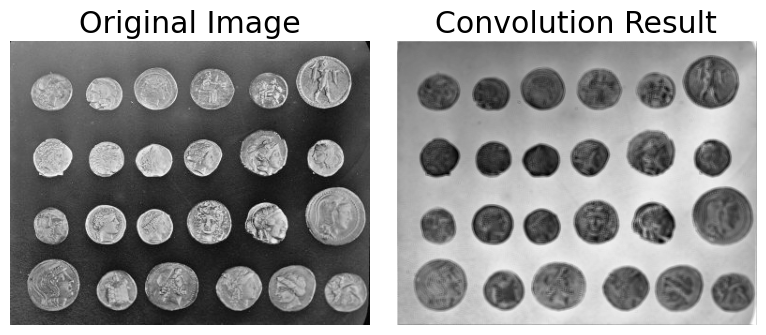

In [9]:
# Load an example image from scikit-image
image = data.coins()

# Define a simple convolution kernel (e.g., edge detection)
kernel = np.array([[-1, -1, -1],
                   [-1,  1, -1],
                   [-1, -1, -1]])

# Apply convolution using SciPy's signal.convolve2d
result = signal.convolve2d(image, kernel, mode='same', boundary='wrap')

# Plot the original image
plt.figure(figsize=(8, 4))
plt.subplot(121)
plt.imshow(image, cmap='gray')
plt.title('Original Image')
plt.axis('off')

# Plot the result of convolution
plt.subplot(122)
plt.imshow(result, cmap='gray')
plt.title('Convolution Result')
plt.axis('off')

# Show the plots
plt.tight_layout()
plt.show()


## Feature findings
Through convolution, we can find the desired pattern in binary and grayscale images. We pass the image with the desired pattern, resulting in highlighted areas on the output image corresponding to the sought pattern.

In the second subplot, a region of interest (ROI) is extracted from the modified page to create the desired pattern or kernel. In this case, the region is selected using slicing (img_with_text[104:115, 63:71]). The kernel is also rotated by 180 degrees.
The second subplot displays the desired pattern or kernel with the title "Desired Pattern (Kernel)."

Rotating the kernel by 180 degrees is necessary to align it correctly for convolution. When you apply convolution, the kernel is typically moved over the input image, and at each position, it is aligned with the corresponding portion of the image to perform element-wise multiplication and summing of the results. To ensure proper alignment, the kernel must have the same orientation as the image region it is comparing.

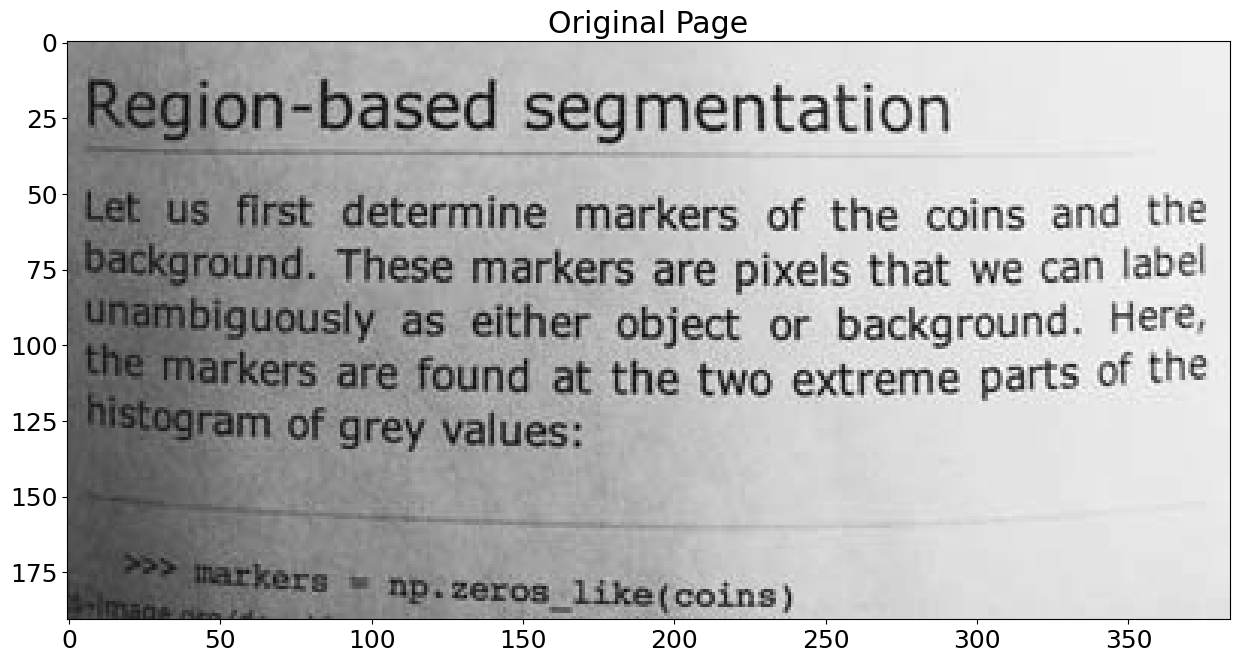

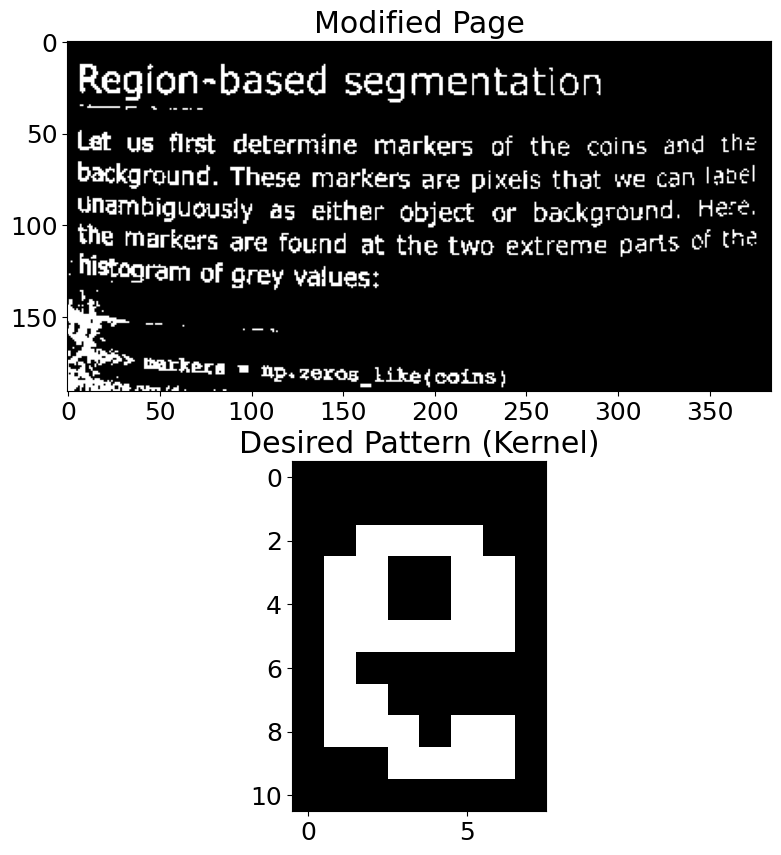

In [10]:
# Load an example image of a page
img_page = data.page()

# Display the original page image
plt.figure(figsize=(15, 10))
plt.imshow(img_page)
plt.title("Original Page")

# Enhance the image and apply a binary threshold
img_with_text = exposure.equalize_adapthist(img_page) < 0.35

# Create a new figure for displaying the modified page and the desired pattern (kernel)
plt.figure(figsize=(15, 10))

# Subplot 1: Display the modified page image
plt.subplot(211)
plt.title("Modified Page")
plt.imshow(img_with_text)

# Extract a region of interest (ROI) from the modified page to create the desired pattern (kernel)
# In this case, a specific region of the modified page is selected.
kernel = transform.rotate(img_with_text[104:115, 63:71], 180)

# Subplot 2: Display the desired pattern (kernel)
plt.subplot(212)
plt.title("Desired Pattern (Kernel)")
plt.imshow(transform.rotate(kernel, 180))

C:\Users\rposa\AppData\Local\Temp\ipykernel_37904\669743000.py:8: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  out = signal.convolve2d(img_with_text.astype(np.float), kernel)


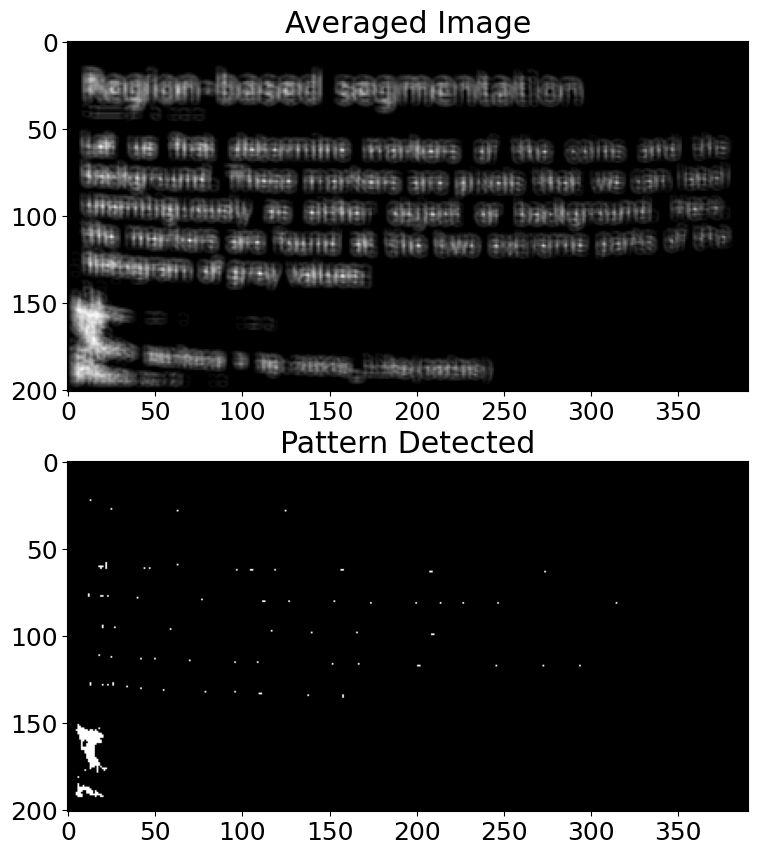

In [11]:
# Create a new figure with subplots
plt.figure(figsize=(15, 10))

# Subplot 1: Convolution Result (Averaged Image)
plt.subplot(211)

# Perform convolution and store the result in 'out'
out = signal.convolve2d(img_with_text.astype(np.float), kernel)

# Set the title for this subplot
plt.title("Averaged Image")

# Display the result of convolution (averaged image)
plt.imshow(out)

# Subplot 2: Convolution Result (Pattern Detection)
plt.subplot(212)

# Set the title for this subplot
plt.title("Pattern Detected")

# Create a binary image based on the convolution result
# The threshold (0.8 * max value) is applied to identify areas with the pattern
feature_location_mask = out > 0.75 * np.max(out)
plt.imshow(feature_location_mask)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


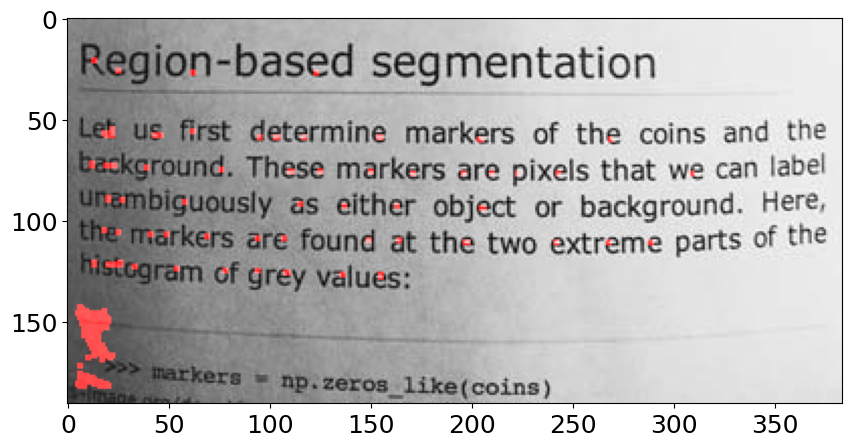

In [12]:
# Perform dilation to increase areas
plt.figure(figsize=(10,30))
if feature_location_mask.shape != img_page.shape:
    feature_location_mask = zoom(feature_location_mask, (img_page.shape[0] / feature_location_mask.shape[0], img_page.shape[1] / feature_location_mask.shape[1]), order=0)

dilated_image = binary_dilation(feature_location_mask, structure=np.ones((3, 3)))
red_mask = np.dstack([dilated_image, np.zeros(feature_location_mask.shape),np.zeros(feature_location_mask.shape)])
plt.imshow(red_mask + np.dstack([img_page,img_page,img_page])/255)